In [1]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io, img_as_ubyte              # utilities to read and write images in various formats
import numpy as np                                # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 16)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Digital Image Processing - Programming Assignment 

The following progamming assignment involves two tasks, viz.: basic histogram processing and spatial domain image filtering tasks, i.e., image sharpening. The deadline for returning your work is **28 March 2022 at 23:59. Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding to the programming assignments, please do not hesitate to contact the course assistant by e-mail at the address dip@unioulu.oulu.fi.

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s): Saara Laasonen, 2686040**
* **Contact information: saara.laasonen@student.oulu.fi**`

# 1. Histogram operations

In the following, you will have to analyze two images, `coffee.jpg` and `pout.tif`, and their histograms, and to compare the results of two histogram operations, namely histogram equalization and stretching. Now, perform the following operations in the reserved code cells and answer to the questions written in **bold** into the reserved spaces in **Finnish or English**.

**1.1. Display the images `coffee.jpg` and `pout.tif` and their histograms in the same figure.**

Hint: You can plot the histogram of an image with matplotlib's __[`hist()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)__ function but please note that you have to ravel the pixels of the 2D image into 1D array first.

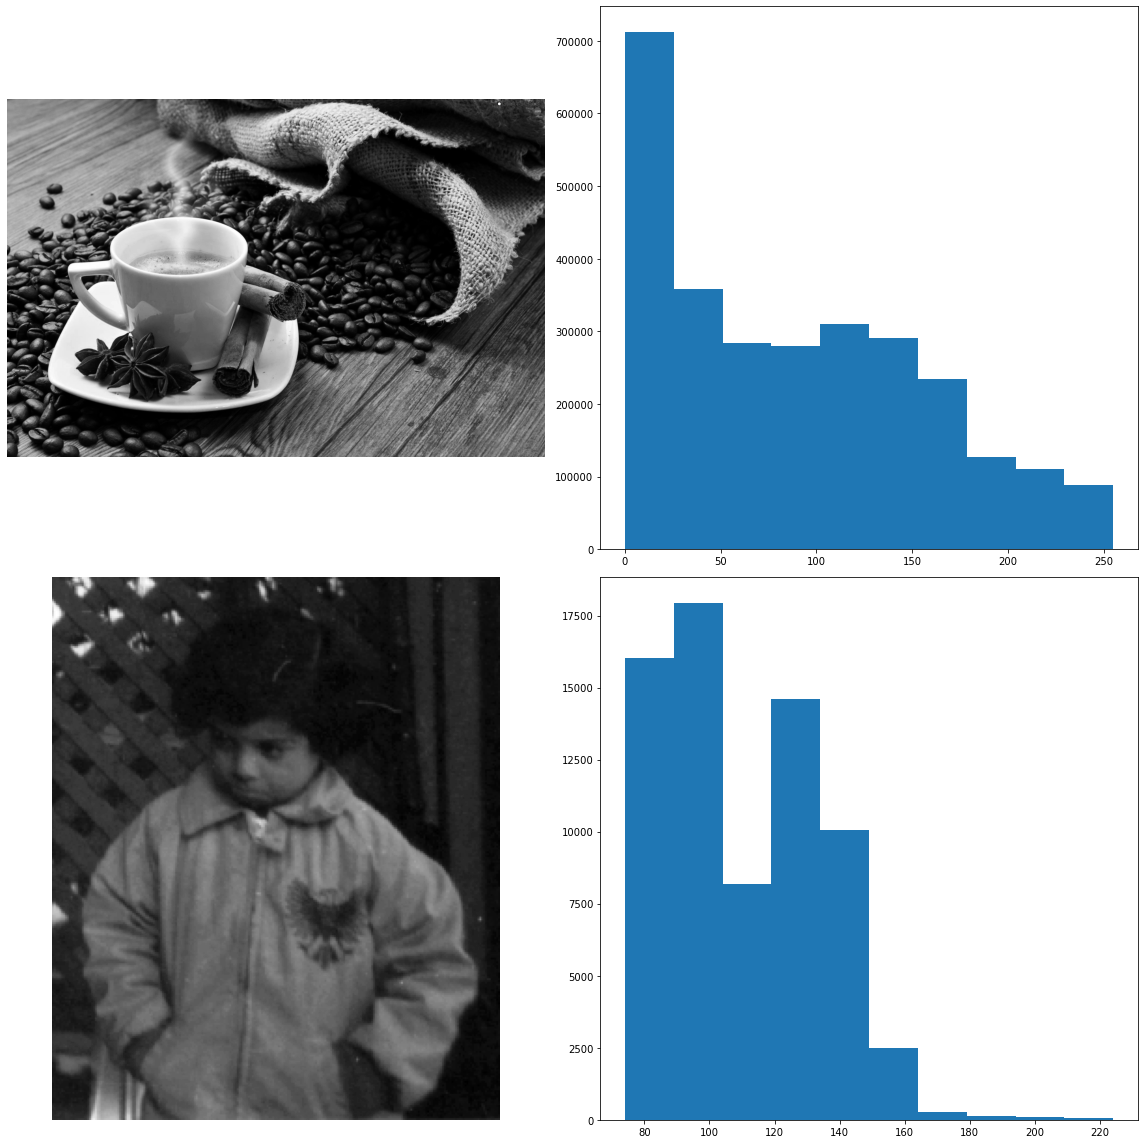

In [2]:
# read the test images
coffee = (io.imread('coffee.jpg', as_gray=True) )  
coffee = img_as_ubyte(coffee)
pout = io.imread('pout.tif')

# display the images and their histograms in the same figure
fig, ax = plt.subplots(figsize=(16,16), nrows=2, ncols=2)
ax[0,0].imshow(coffee)
ax[0,0].axis('off')
ax[0,1].hist(coffee.ravel())

ax[1,0].imshow(pout)
ax[1,0].axis('off')
ax[1,1].hist(pout.ravel())

fig.tight_layout()

**Compare the two images and their histograms. What can you say about the contrast of the images?**

`Coffee.jpgs histogram beginning there is huge spike in the beginning that can also be found pout.tifs histogram. Pout.tifs histogram pretty much stops at 160 on x-axel while coffee.jpgs continues up to 250. Coffee.jpgs histogram is more even than pout.tifs. From the photos you can see that coffee.jps has more contrast and thusly is more clear than pout.tif. So the contrast is greater on the photo which has wider histogram.`

### Histogram equalization

**1.2. Perform histogram equalization with the function __[`exposure.equalize_hist()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist)__ and display the resulting images and their histograms in the same figure.**

Hint: Please note that `exposure.equalize_hist()` function returns `float64` image. You need to __[convert the image back to `uint8`](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after histogram equalization so that the intensity value range of the resulting and original histograms are comparable.

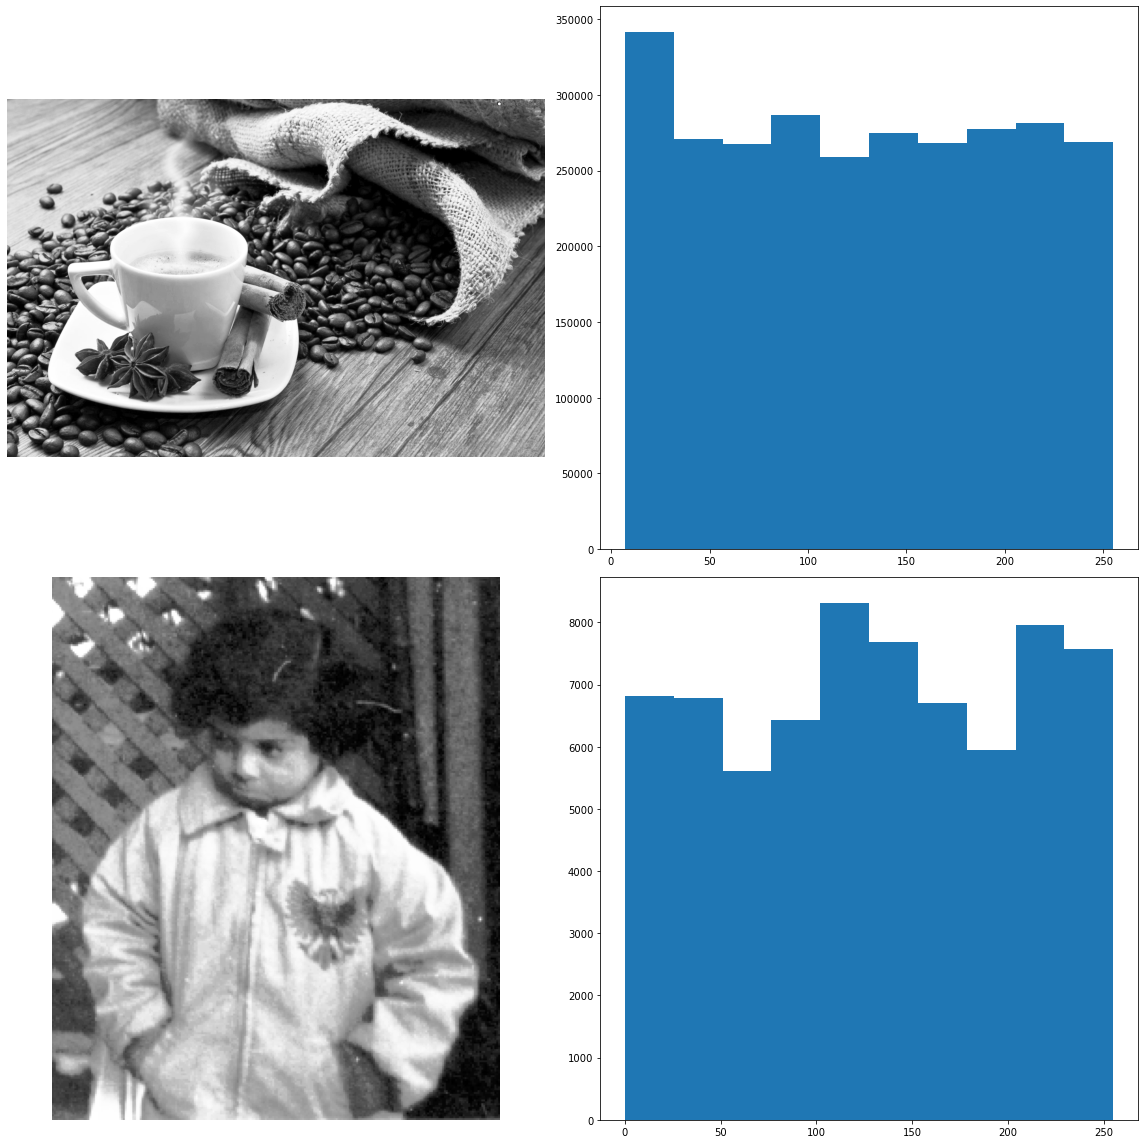

In [3]:
from skimage import exposure
from skimage import img_as_ubyte

# perform histogram equalization and convert data type from 'float64' back to 'uint8' after histogram equalization
coffee1 = exposure.equalize_hist(coffee)
pout1 = exposure.equalize_hist(pout)
coffeeh = img_as_ubyte(coffee1)
pouth = img_as_ubyte(pout1)

# display resulting images and their histograms in the same figure
fig, ax = plt.subplots(figsize=(16,16), nrows=2, ncols=2)
ax[0,0].imshow(coffeeh)
ax[0,0].axis('off')
ax[0,1].hist(coffeeh.ravel())

ax[1,0].imshow(pouth)
ax[1,0].axis('off')
ax[1,1].hist(pouth.ravel())

fig.tight_layout()

**Again, compare the two images. Did histogram equalization help in increasing image contrast? Why or why not?**

`Coffee.jpgs histograms is more even than before and so is pout.tifs. Histogram equalization helped to increase image contranst in both photos. Both of the photos have become more lighter so you can see the contrasts between different shades much better than before histogram equalization.`

### Contrast stretching

Another way of improving the contrast in an image is to simply stretch the original pixel values over an extended dynamic range using a linear scaling function. For instance, in case of an `uint8` image, the desired value range of a contrast-stretched image could be the full range from 0 to 255. 

Intuitively, one could perform contrast-stretching by selecting the minimum and maximum values of the original image and map these values to 0 and 255, respectively, and linearly scale all other pixel values in between accordingly. However, even a single outlier pixel value (high or low) can affect the input scaling range too much when outcome of the histogram stretching is not particularly good.

A more robust approach is to map the intensity values so that e.g. 1st and 99th percentiles of the histogram are saturated at the minimum and maximum values of the desired intensity range. In other words, 1% of the pixels of both low and high intensities will be mapped to 0 and 255 in the contrast-stretched image while rest are scaled linearly in between.

**1.3. Now, perform contrast stretching on the original images with the help of functions __[`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)__ and __[`exposure.rescale_intensity()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)__ so that the full range from 0 and 255 is utilized based on the 1st and 99th percentiles of their histograms. Then, display the resulting images and their histograms in the same figure.**

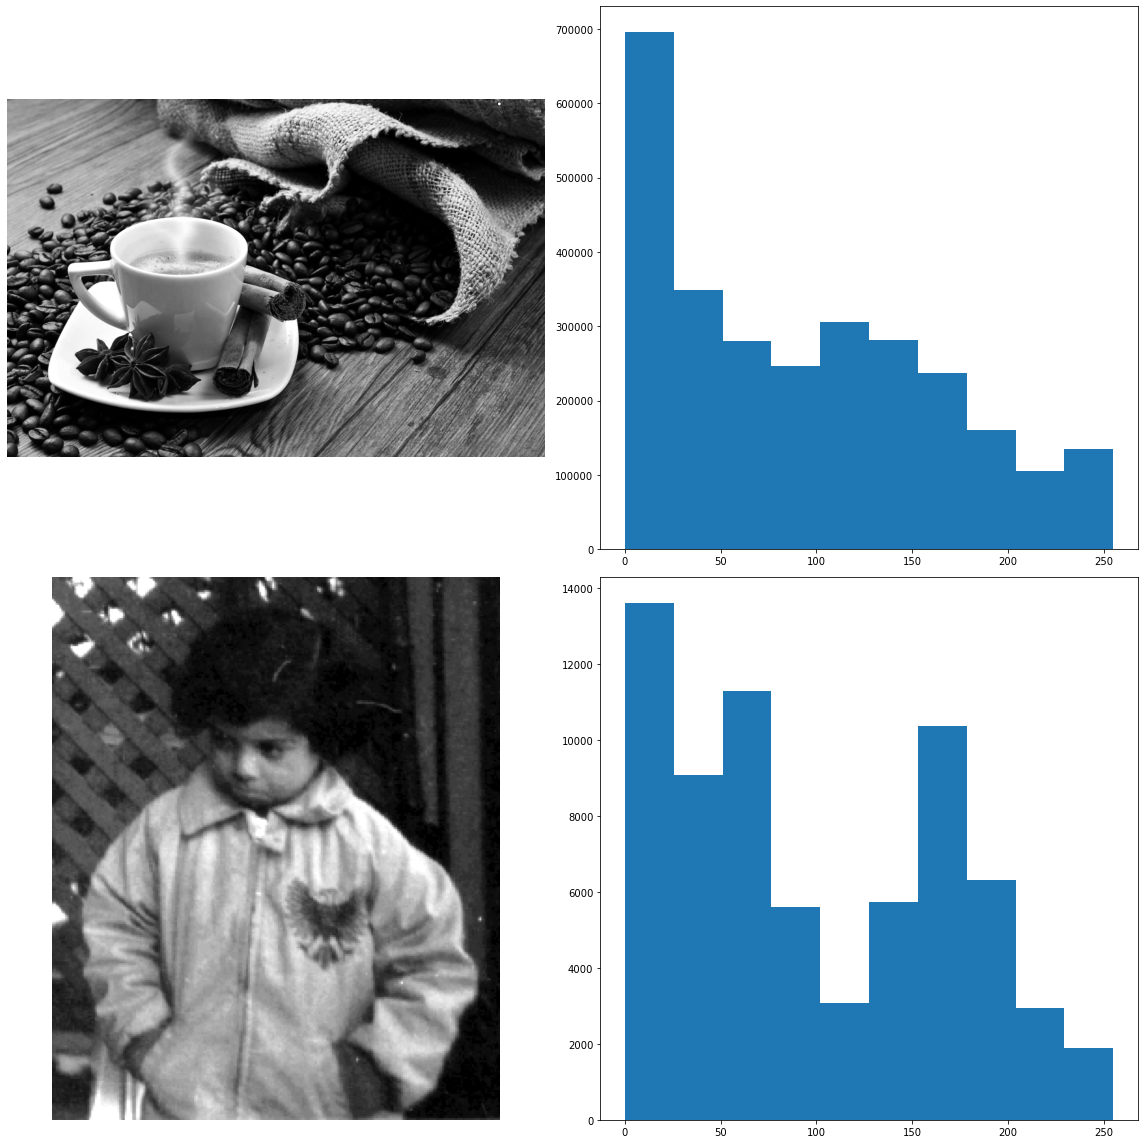

In [4]:
# find the 1st and 99th percentiles of each image
c1, c2 = np.percentile(coffee, (1,99))
p1, p2 = np.percentile(pout,(1,99))
# rescale the intensities of both images to full 'uint8' range [0, 255] based on their 1st and 99th percentiles
coffees = exposure.rescale_intensity(coffee, in_range=(c1, c2)).astype(np.uint8)
pouts = exposure.rescale_intensity(pout, in_range=(p1, p2)).astype(np.uint8)
# display resulting images and their histograms
fig, ax = plt.subplots(figsize=(16,16), nrows=2, ncols=2)
ax[0,0].imshow(coffees)
ax[0,0].axis('off')
ax[0,1].hist(coffees.ravel())

ax[1,0].imshow(pouts)
ax[1,0].axis('off')
ax[1,1].hist(pouts.ravel())

fig.tight_layout()

### Comparison

**1.4. Finally, display the original `coffee.jpg` image, and its histogram-equalized and contrast-stretched versions and the corresponding histograms into one figure (in total six images in one figure). Do the same for `pout.tif` as well.**

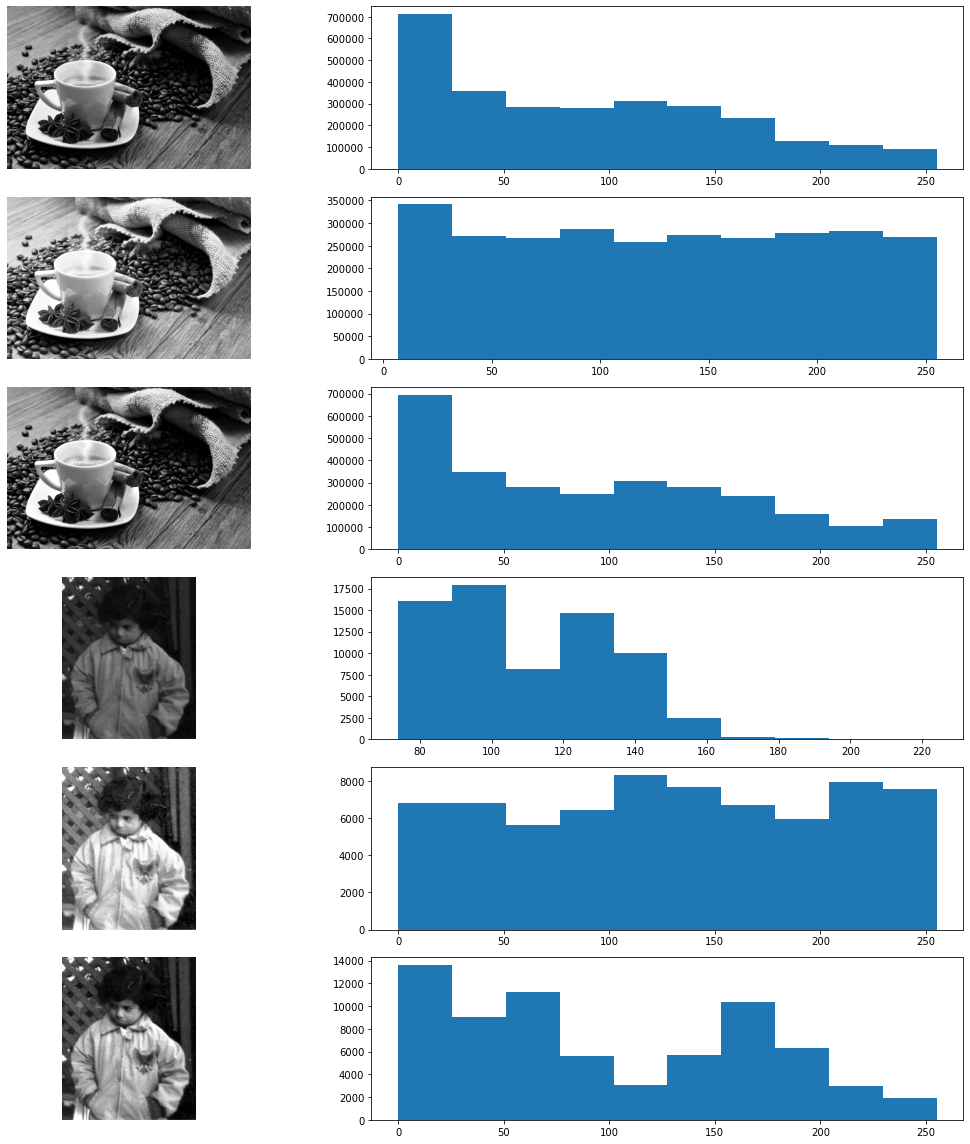

In [5]:
# 6 subplots for 'coffee.jpg'
fig, ax = plt.subplots(figsize=(16,16), nrows=6, ncols=2)
ax[0,0].imshow(coffee)
ax[0,0].axis('off')
ax[0,1].hist(coffee.ravel())

ax[1,0].imshow(coffeeh)
ax[1,0].axis('off')
ax[1,1].hist(coffeeh.ravel())

ax[2,0].imshow(coffees)
ax[2,0].axis('off')
ax[2,1].hist(coffees.ravel())

# 6 subplots for 'pout.tif'

ax[3,0].imshow(pout)
ax[3,0].axis('off')
ax[3,1].hist(pout.ravel())

ax[4,0].imshow(pouth)
ax[4,0].axis('off')
ax[4,1].hist(pouth.ravel())

ax[5,0].imshow(pouts)
ax[5,0].axis('off')
ax[5,1].hist(pouts.ravel())

fig.tight_layout()

**Which method gives better result for each of the two images in** ***your*** **opinion? Why??**

`For coffee.jpg the better results come with histogram-equalized version because the picture is brighter and has slightly better contrast than the contrast-stretched version. For pout.tif the better results come with histogram-equalized version because the picture is more brighter and has more contrast between different shades.`

# 2. Image sharpening

First, read the part concerning sharpening spatial transforms in the lecture notes or in the course book.

In this exercise, your task is to perform a sharpening transform to the image `moonunsharp.tif` in spatial domain enhancing the details, like edges, in the original grayscale image. The use of built-in functions that perform image sharpening from scratch, like `scipy.misc.imfilter()`, is forbidden but functions like __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ can be used for the task. You can select some method presented in the lecture notes or the course book, e.g. use Laplacian operator and convolution, for sharpening the test image. 

Please note that it does not matter what method you use or how “good” the sharpening looks as long as the sharpening can be observed in the end result. An example result achieved with __[`ImageFilter`](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html)__ is shown below:

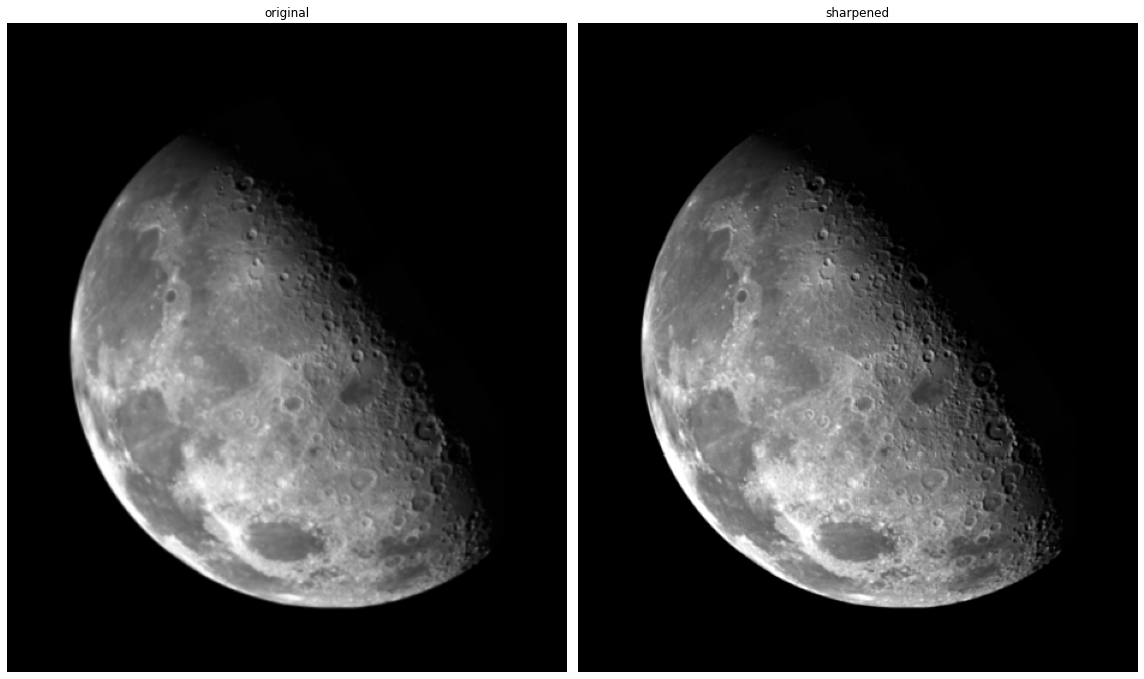

In [6]:
# image sharpening example using 'ImageFilter' module from PILLOW with 'image.filter()' function
from PIL import ImageFilter, Image

moon = Image.open('moonunsharp.tif')
moon_sharp_example = moon.filter(ImageFilter.SHARPEN)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(moon, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(moon_sharp_example, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

**2.1. Now, implement your own image sharpening transform and apply it on the test image.**

Hint: Like in the previous task, please note the __[image data type (`dtype`) and corresponding value range](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after filtering/sharpening as unexpected errors with arithmetic may occur (see pre-tutorials) !

In [7]:
# perform image sharpening using e.g. a Laplacian mask and convolution
from scipy import signal
from scipy import ndimage
#used laplacian mask instead of convolve 2d, link in the resources
#subtracted the ndimage from the original photo, link in the resources
moon_sharp = moon - ndimage.laplace(moon).astype(np.uint8)

**2.2. Display the original and sharpened moon images in the same figure.**

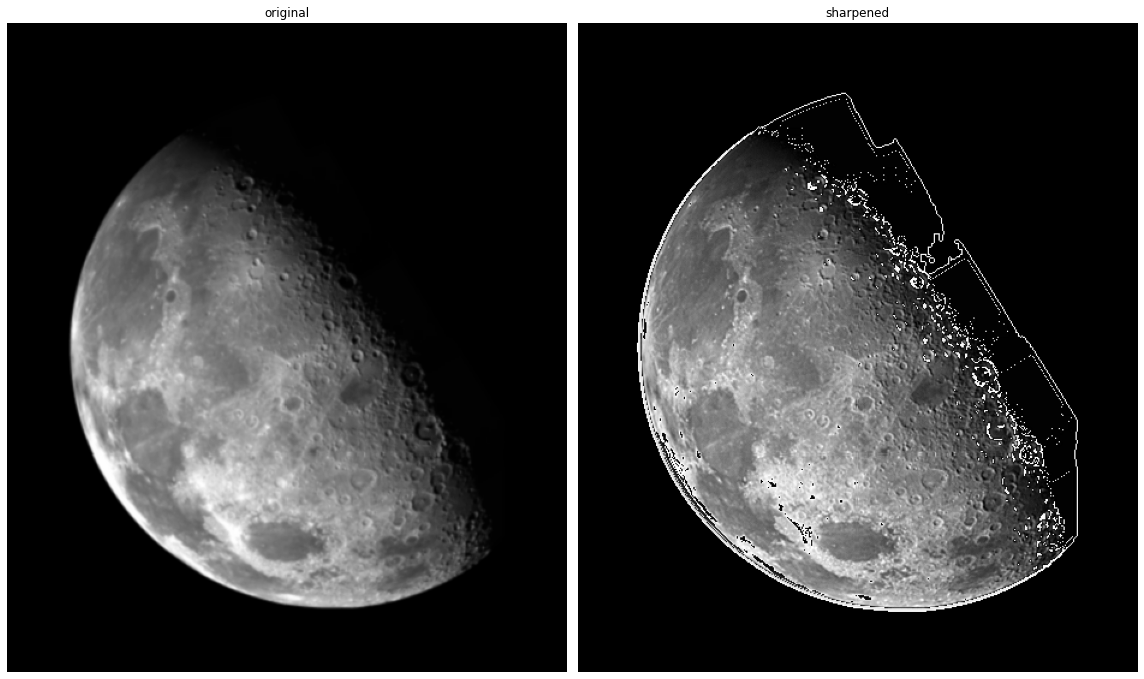

In [8]:
# plot original and sharpened moon images in the same figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(moon, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(moon_sharp, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`It took me 2 hours to complete this exercise.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`I had lot of trouble with the comparison exercise and image sharpening. There was enough help for the comparison but for the image sharpening I had to google a lot how to use the convolve2d properly but it did not look correct so I had to use ndimage which looks much better.`

# References
`Rescale intensity with percentiles: https://scikit-image.org/docs/0.12.x/auto_examples/color_exposure/plot_equalize.html
Laplacian mask: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html
Substracting the ndimage from moon : https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm (explanation below Guidelines for use header)`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA1_[student number(s)].ipynb`** (e.g. `DIP_PA1_1234567.ipynb` if solo work or `DIP_PA1_1234567-7654321.ipynb` if working in a pair)